# MERGE009
Best of Each Type as of July 3

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
from sklearn.metrics import mean_absolute_error

def group_mean_log_mae(y_true, y_pred, groups, floor=1e-9):
    maes = (y_true-y_pred).abs().groupby(groups).mean()
    return np.log(maes.map(lambda x: max(x, floor))).mean()

In [2]:
tracking = pd.read_csv('../tracking/tracking.csv')

In [3]:
tracking.head()

,run_id,model_number,eval_metric,n_estimators,early_stopping_rounds,random_state,n_threads,learning_rate,n_fold,model_type,training_time,n_features,depth,gml_oof_score,oof_score,lb_score,1JHC_mae_cv,2JHH_mae_cv,1JHN_mae_cv,2JHN_mae_cv,2JHC_mae_cv,3JHH_mae_cv,3JHC_mae_cv,3JHN_mae_cv,1JHC_std_mae_cv,2JHH_std_mae_cv,1JHN_std_mae_cv,2JHN_std_mae_cv,2JHC_std_mae_cv,3JHH_std_mae_cv,3JHC_std_mae_cv,3JHN_std_mae_cv,1JHC_tr_sec_f1,1JHC_pred_sec_f1,1JHC_tr_sec_f2,1JHC_pred_sec_f2,2JHH_tr_sec_f1,2JHH_pred_sec_f1,2JHH_tr_sec_f2,2JHH_pred_sec_f2,1JHN_tr_sec_f1,1JHN_pred_sec_f1,1JHN_tr_sec_f2,1JHN_pred_sec_f2,2JHN_tr_sec_f1,2JHN_pred_sec_f1,2JHN_tr_sec_f2,2JHN_pred_sec_f2,2JHC_tr_sec_f1,2JHC_pred_sec_f1,2JHC_tr_sec_f2,2JHC_pred_sec_f2,3JHH_tr_sec_f1,3JHH_pred_sec_f1,3JHH_tr_sec_f2,3JHH_pred_sec_f2,3JHC_tr_sec_f1,3JHC_pred_sec_f1,3JHC_tr_sec_f2,3JHC_pred_sec_f2,3JHN_tr_sec_f1,3JHN_pred_sec_f1,3JHN_tr_sec_f2,3JHN_pred_sec_f2,1JHC_csv_save_sec,2JHH_csv_save_sec,1JHN_csv_save_sec,2JHN_csv_save_sec,2JHC_csv_save_sec,3JHH_csv_save_sec,3JHC_csv_save_sec,3JHN_csv_save_sec,1JHC_tr_sec_f3,1JHC_pred_sec_f3,2JHH_tr_sec_f3,2JHH_pred_sec_f3,1JHN_tr_sec_f3,1JHN_pred_sec_f3,2JHN_tr_sec_f3,2JHN_pred_sec_f3,3JHH_tr_sec_f3,3JHH_pred_sec_f3,2JHC_tr_sec_f3,2JHC_pred_sec_f3,3JHC_tr_sec_f3,3JHC_pred_sec_f3,3JHN_tr_sec_f3,3JHN_pred_sec_f3,2JHN_f1_best_iter,2JHN_f2_best_iter,1JHN_f1_best_iter,1JHN_f2_best_iter,3JHN_f1_best_iter,3JHN_f2_best_iter,2JHH_f1_best_iter,2JHH_f2_best_iter,3JHH_f1_best_iter,3JHH_f2_best_iter,1JHC_f1_best_iter,1JHC_f2_best_iter,2JHC_f1_best_iter,2JHC_f2_best_iter,3JHC_f1_best_iter,3JHC_f2_best_iter,2JHNcv_f1,2JHNcv_f2,3JHNcv_f1,3JHNcv_f2,2JHCcv_f1,2JHCcv_f2,3JHCcv_f1,3JHCcv_f2,2JHHcv_f1,2JHHcv_f2,1JHNcv_f1,1JHNcv_f2,3JHHcv_f1,3JHHcv_f2,1JHCcv_f1,1JHCcv_f2
0,0610_1341,M010,mae,500000.0,500.0,529.0,32.0,0.5,5.0,NaN,NaN,61.0,NaN,NaN,0.9210,-0.452,1.9206,0.4542,1.0336,0.5335,0.8405,0.5699,0.8593,0.3264,0.00388,0.00112,0.00945,0.00394,0.00131,0.00149,0.00279,0.00184,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0611_0308,M012,mae,500000.0,500.0,529.0,32.0,0.5,5.0,NaN,NaN,28.0,NaN,NaN,1.0109,-0.202,1.8632,0.4782,0.9773,0.5826,1.0352,0.6167,0.9867,0.3553,0.00415,0.00060,0.01524,0.00399,0.00435,0.00285,0.00162,0.00088,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0611_1250,M013,mae,50000.0,500.0,529.0,32.0,0.5,5.0,catboost,137353.19,28.0,NaN,NaN,0.9488,NaN,1.7478,0.4442,1.0337,0.5300,0.9603,0.5761,0.9359,0.3300,0.00485,0.00293,0.01892,0.00264,0.00330,0.00167,0.00182,0.00202,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0611_1249,M014,mae,500000.0,500.0,529.0,24.0,0.3,5.0,NaN,NaN,28.0,NaN,NaN,0.9142,-0.275,1.7005,0.4378,0.8751,0.5070,0.9209,0.5596,0.8967,0.3167,0.00432,0.00156,0.01019,0.00536,0.00292,0.00243,0.00197,0.00191,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Na

In [4]:
for cv in ['1JHC_mae_cv', '2JHH_mae_cv', '1JHN_mae_cv',
          '2JHN_mae_cv', '2JHC_mae_cv', '3JHH_mae_cv',
          '3JHC_mae_cv', '3JHN_mae_cv']:
    print(f'----------{cv}----------')
    print(tracking[['model_number','run_id','model_type', cv]] \
          .set_index('model_number') \
          .sort_values(cv) \
          .head())

----------1JHC_mae_cv----------
                 run_id model_type  1JHC_mae_cv
model_number                                   
M043          0710_2124   catboost       0.5124
M044          0711_1936   catboost       0.5376
M042          0709_1336   catboost       0.5650
M040          0708_1639   catboost       0.5782
M031          0702_0822   catboost       0.5793
----------2JHH_mae_cv----------
                 run_id model_type  2JHH_mae_cv
model_number                                   
M043          0710_2124   catboost       0.1382
M038          0707_0907   catboost       0.1405
M040          0708_1639   catboost       0.1421
M042          0709_1336   catboost       0.1428
M039          0708_1415   catboost       0.1440
----------1JHN_mae_cv----------
                 run_id model_type  1JHN_mae_cv
model_number                                   
M030          0701_1300       lgbm       0.3582
M043          0710_2124   catboost       0.3764
M035          0704_2344       lgbm      

In [5]:
# 1JHC - M043
# 2JHH - M038
# 1JHN - M030
# 2JHN - M031
# 2JHC - M040
# 3JHH - M038
# 3JHC - M042
# 3JHN - M038

sub_M031 = pd.read_csv('../temp/M031/temp4of8_M031_0702_0822_submission_lgb_3folds_5000000iter_0.05lr.csv')
oof_M031 = pd.read_csv('../temp/M031/temp4of8_M031_0702_0822_oof_lgb_3folds_5000000iter_0.05lr.csv')

In [6]:
sub_M038 = pd.read_csv('../temp/M038/temp6of8_M038_0707_0907_submission_catboost_2folds_500000iter_0.08lr.csv')
oof_M038 = pd.read_csv('../temp/M038/temp6of8_M038_0707_0907_oof_catboost_2folds_500000iter_0.08lr.csv')

In [7]:
sub_M040 = pd.read_csv('../temp/M040/temp2of8_M040_0708_1639_submission_catboost_2folds_500000iter_0.1lr.csv')
oof_M040 = pd.read_csv('../temp/M040/temp2of8_M040_0708_1639_oof_catboost_2folds_500000iter_0.1lr.csv')

In [8]:
sub_M037 = pd.read_csv('../submissions/M037_0706_2029_submission_lgb_2folds_-1.5106CV_500000iter_0.1lr.csv')
oof_M037 = pd.read_csv('../oof/M037_0706_2029_oof_catboost_2folds_-1.5106CV_500000iter_0.1lr.csv')

In [9]:
sub_M044 = pd.read_csv('../submissions/M044_0711_1936_submission_lgb_2folds_1.3506CV_500000iter_0.1lr.csv')
oof_M044 = pd.read_csv('../oof/M044_0711_1936_oof_catboost_2folds_1.3506CV_500000iter_0.1lr.csv')

In [10]:
sub_M030_a = pd.read_csv('../temp/M030/temp4of8_M030_0701_1300_submission_lgb_3folds_5000000iter_0.05lr.csv')
sub_M030_b = pd.read_csv('../temp/M030/temp4of8_M030_0701_1302_submission_lgb_3folds_5000000iter_0.05lr.csv')
sub_M030_c = pd.read_csv('../temp/M030/temp4of8_M030_0701_1304_submission_lgb_3folds_5000000iter_0.05lr.csv')
sub_M030 = sub_M030_a.copy()
sub_M030['scc_a'] = sub_M030_a['scalar_coupling_constant']
sub_M030['scc_b'] = sub_M030_b['scalar_coupling_constant']
sub_M030['scc_c'] = sub_M030_c['scalar_coupling_constant']
sub_M030['scalar_coupling_constant'] = sub_M030[['scc_a','scc_b','scc_c']].mean(axis=1)
sub_M030 = sub_M030.drop(['scc_a','scc_b','scc_c'], axis=1).copy()

In [11]:
oof_M030_a = pd.read_csv('../temp/M030/temp4of8_M030_0701_1300_oof_lgb_3folds_5000000iter_0.05lr.csv')
oof_M030_b = pd.read_csv('../temp/M030/temp4of8_M030_0701_1302_oof_lgb_3folds_5000000iter_0.05lr.csv')
oof_M030_c = pd.read_csv('../temp/M030/temp4of8_M030_0701_1304_oof_lgb_3folds_5000000iter_0.05lr.csv')
oof_M030 = oof_M030_a.copy()
oof_M030['scc_a'] = oof_M030_a['oof_preds']
oof_M030['scc_b'] = oof_M030_b['oof_preds']
oof_M030['scc_c'] = oof_M030_c['oof_preds']
oof_M030['oof_preds'] = oof_M030[['scc_a','scc_b','scc_c']].sum(axis=1)
oof_M030 = oof_M030.drop(['scc_a','scc_b','scc_c'], axis=1).copy()

In [12]:
oof_M042 = pd.read_csv('../oof/M042_0709_1336_oof_catboost_2folds_-0.9447CV_500000iter_0.1lr.csv')
sub_M042 = pd.read_csv('../submissions/M042_0709_1336_submission_lgb_2folds_-0.9447CV_500000iter_0.1lr.csv')

In [13]:
oof_M043 = pd.read_csv('../oof/M043_0710_2124_oof_catboost_2folds_-1.5582CV_500000iter_0.1lr.csv')
sub_M043 = pd.read_csv('../submissions/M043_0710_2124_submission_lgb_2folds_-1.5582CV_500000iter_0.1lr.csv')

In [14]:
sub_M043 = sub_M043.sort_values('id').reset_index(drop=True)

In [15]:
oof_M043 = oof_M043.sort_values('id').reset_index(drop=True)

In [16]:
oof_final = oof_M031[['id','type','scalar_coupling_constant']].copy()
test = pd.read_csv('../input/test.csv')


oof_final.loc[oof_final['type'].isin(['2JHN']), 'oof_preds'] = \
    oof_M031.loc[oof_final['type'].isin(['2JHN'])]['oof_preds']
test.loc[test['type'].isin(['2JHN']), 'scalar_coupling_constant'] = \
    sub_M031.loc[test['type'].isin(['2JHN'])]['scalar_coupling_constant']

oof_final.loc[oof_final['type'].isin(['1JHN']), 'oof_preds'] = \
    oof_M030.loc[oof_final['type'].isin(['1JHN'])]['oof_preds']
test.loc[test['type'].isin(['1JHN']), 'scalar_coupling_constant'] = \
    sub_M030.loc[test['type'].isin(['1JHN'])]['scalar_coupling_constant']

oof_final.loc[oof_final['type'].isin(['3JHC']), 'oof_preds'] = \
    oof_M042.loc[oof_final['type'].isin(['3JHC'])]['oof_preds']
test.loc[test['type'].isin(['3JHC']), 'scalar_coupling_constant'] = \
    sub_M042.loc[test['type'].isin(['3JHC'])]['scalar_coupling_constant']

oof_final.loc[oof_final['type'].isin(['2JHH','3JHH','3JHN']), 'oof_preds'] = \
    oof_M038.loc[oof_final['type'].isin(['2JHH','3JHH','3JHN'])]['oof_preds']
test.loc[test['type'].isin(['2JHH','3JHH','3JHN']), 'scalar_coupling_constant'] = \
    sub_M038.loc[test['type'].isin(['2JHH','3JHH','3JHN'])]['scalar_coupling_constant']

oof_final.loc[oof_final['type'].isin(['2JHC']), 'oof_preds'] = \
    oof_M040.loc[oof_final['type'].isin(['2JHC'])]['oof_preds']
test.loc[test['type'].isin(['2JHC']), 'scalar_coupling_constant'] = \
    sub_M040.loc[test['type'].isin(['2JHC'])]['scalar_coupling_constant']

oof_final.loc[oof_final['type'].isin(['1JHC']), 'oof_preds'] = \
    oof_M044.loc[oof_final['type'].isin(['1JHC'])]['oof_preds']
test.loc[test['type'].isin(['1JHC']), 'scalar_coupling_constant'] = \
    sub_M044.loc[test['type'].isin(['1JHC'])]['scalar_coupling_constant']


In [17]:
for i, d in oof_final.groupby('type'):
    print(i)
    print(mean_absolute_error(d['scalar_coupling_constant'], d['oof_preds']))

1JHC
0.5376118739027016
1JHN
0.35815790678334736
2JHC
0.21914016019278726
2JHH
0.14050419747612156
2JHN
0.13000911360249118
3JHC
0.24579182657408416
3JHH
0.14977686316390257
3JHN
0.11470001176414876


In [18]:
group_mean_log_mae(oof_final['scalar_coupling_constant'], oof_final['oof_preds'], oof_final['type'])

-1.5794282832082513

In [19]:
sub_M025 = pd.read_csv('../submissions/M025_0629_1311_submission_lgb_2folds_-1.3265CV_500000iter_0.1lr.csv')
test['scc_good'] = sub_M025['scalar_coupling_constant']

In [20]:
test[['scc_good','scalar_coupling_constant']].corr()

,scc_good,scalar_coupling_constant
scc_good,1.000000,0.999918
scalar_coupling_constant,0.999918,1.000000


In [21]:
test[['id','scalar_coupling_constant']] \
    .to_csv('../submissions/MERGE011_submission_M030_M031_M038_M40_M042_M044_-1.5794.csv', index=False)

In [22]:
oof_final.to_csv('../oof/MERGE011_submission_M030_M031_M038_M40_M042_M044_-1.57944CV.csv', index=False)

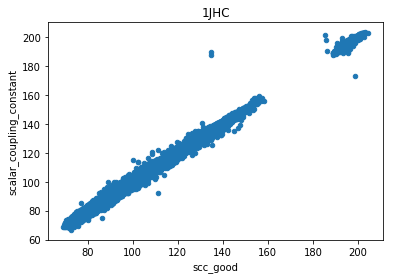

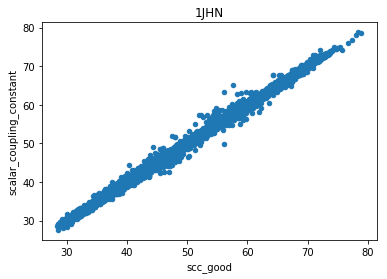

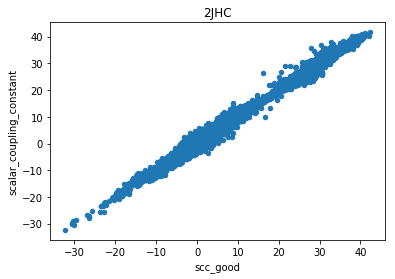

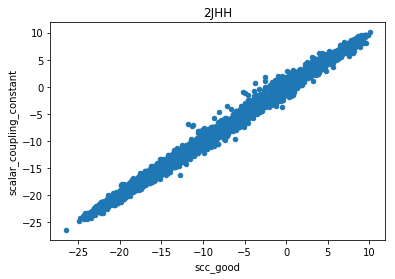

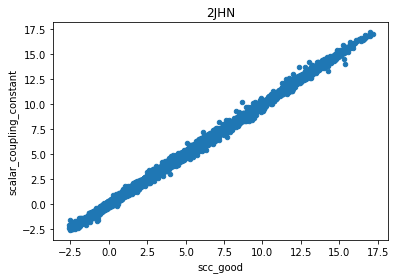

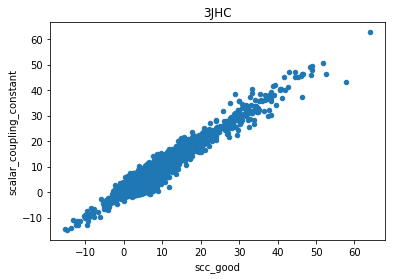

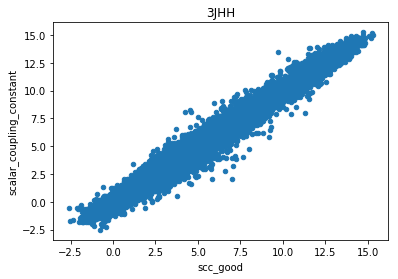

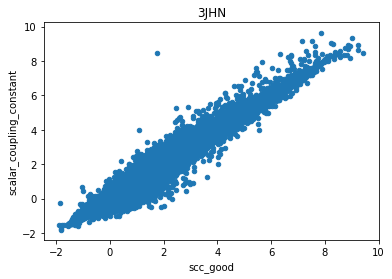

In [27]:
for i, d in test.groupby('type'):
    d.plot(x='scc_good', y='scalar_coupling_constant', kind='scatter', title=i)
    plt.show()